In [1]:
# !pip install konlpy

In [22]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import konlpy

from collections import Counter

In [3]:
reviews_df = pd.read_csv('rating_df.csv', encoding='utf-8', index_col=0, parse_dates=['Timestamp'])
reviews_df.head()

,review_code,place_code,ItemID,UserID,review,Rating,Timestamp
0,SB000001,STORE_SB0001,성북동메밀수제비누룽지백숙,te9a7m,너무비싸,2.0,2021-08-08
1,SB000002,STORE_SB0001,성북동메밀수제비누룽지백숙,7kup8e,맛은 좋으나 기다림이 문제,3.0,2021-07-14
2,SB000003,STORE_SB0001,성북동메밀수제비누룽지백숙,fkfake,NaN,3.0,2021-06-26
3,SB000004,STORE_SB0001,성북동메밀수제비누룽지백숙,g8k5fl,들깨수제비까지 욕심부리면 배터집니다. 백숙과 메일전이면 충분 남은 음식 포장 가능,4.0,2021-06-20
4,SB000005,STORE_SB0001,성북동메밀수제비누룽지백숙,n5mvk0,굿 애프터하이크 푸드,4.0,2021-05-23


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_code  15420 non-null  object        
 1   place_code   15420 non-null  object        
 2   ItemID       15420 non-null  object        
 3   UserID       10828 non-null  object        
 4   review       12475 non-null  object        
 5   Rating       14008 non-null  float64       
 6   Timestamp    15420 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 963.8+ KB


In [5]:
reviews_df.isna().sum()

review_code       0
place_code        0
ItemID            0
UserID         4592
review         2945
Rating         1412
Timestamp         0
dtype: int64

In [6]:
#결측치 제거
reviews = reviews_df.dropna(axis=0)

In [29]:
# reviews.isna().values.any()

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9086 entries, 0 to 15419
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_code  9086 non-null   object        
 1   place_code   9086 non-null   object        
 2   ItemID       9086 non-null   object        
 3   UserID       9086 non-null   object        
 4   review       9086 non-null   object        
 5   Rating       9086 non-null   float64       
 6   Timestamp    9086 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 567.9+ KB


In [17]:
# 중복값 확인
reviews['Rating'].nunique(), reviews['review'].nunique()

(5, 8907)

In [19]:
reviews[reviews.duplicated(['review'])]

,review_code,place_code,ItemID,UserID,review,Rating,Timestamp
713,SB000714,STORE_SB0005,성북동면옥집,lc0foc,굳,4.0,2019-08-26
725,SB000726,STORE_SB0005,성북동면옥집,kdrbif,최고~~,5.0,2018-10-30
909,SB000910,STORE_SB0008,공푸,1c1mu4t,맛나요,5.0,2021-03-04
947,SB000948,STORE_SB0008,공푸,e2kb4f,최고,5.0,2020-07-05
1274,SB001275,STORE_SB0011,팔백집,s7eplh,맛있어요,4.0,2019-12-03
...,...,...,...,...,...,...,...
15096,GB005361,STORE_GB0371,미태리 미아뉴타운점,7khi0j,선한영향력가게,5.0,2021-03-16
15118,GB005383,STORE_GB0376,미스사이공 수유점,19gknbs,가성비갑,5.0,2020-06-29
15196,GB005461,STORE_GB0387,도미노피자 수유점,16u3ka2,좋았습니다,5.0,2021-02-23
15284,GB005549,STORE_GB0395,BHC치킨 강북구청점,7tekfm,불친절,1.0,2021-01-15


In [16]:
# reviews.drop_duplicates(subset=['review'], inplace=True)
# reviews.info()

In [56]:
reviews['label'] = np.select([reviews.Rating > 3], [1], default=0)
reviews.head()

,review_code,place_code,ItemID,UserID,review,Rating,Timestamp,label
0,SB000001,STORE_SB0001,성북동메밀수제비누룽지백숙,te9a7m,너무비싸,2.0,2021-08-08,0
1,SB000002,STORE_SB0001,성북동메밀수제비누룽지백숙,7kup8e,맛은 좋으나 기다림이 문제,3.0,2021-07-14,0
3,SB000004,STORE_SB0001,성북동메밀수제비누룽지백숙,g8k5fl,들깨수제비까지 욕심부리면 배터집니다. 백숙과 메일전이면 충분 남은 음식 포장 가능,4.0,2021-06-20,1
4,SB000005,STORE_SB0001,성북동메밀수제비누룽지백숙,n5mvk0,굿 애프터하이크 푸드,4.0,2021-05-23,1
5,SB000006,STORE_SB0001,성북동메밀수제비누룽지백숙,1dtoiih,좋아 함. 그래서 자주 감. 근데 닭보다 누룽지가 훨 맛있음. 누룽지를 먹기 위해 ...,4.0,2021-05-13,1


In [65]:
rating = reviews[['review','Rating','label']]
rating.head()

,review,Rating,label
0,너무비싸,2.0,0
1,맛은 좋으나 기다림이 문제,3.0,0
3,들깨수제비까지 욕심부리면 배터집니다. 백숙과 메일전이면 충분 남은 음식 포장 가능,4.0,1
4,굿 애프터하이크 푸드,4.0,1
5,좋아 함. 그래서 자주 감. 근데 닭보다 누룽지가 훨 맛있음. 누룽지를 먹기 위해 ...,4.0,1


In [76]:
rating.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
rating['review'] = rating['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # # 한글과 공백을 제외하고 모두 제거 (정규 표현식 수행)
rating['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
rating = rating.dropna(how='any') # Null 값 제거
print('샘플 개수 :',len(rating))

샘플 개수 : 8878


In [77]:
train_data, test_data = train_test_split(rating, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 6658
테스트용 리뷰의 개수 : 2220


<AxesSubplot:>

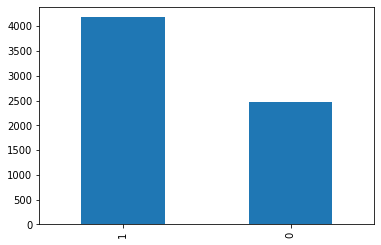

In [78]:
train_data['label'].value_counts().plot(kind = 'bar')

In [79]:
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,2480
1,1,4178


In [80]:
# 토큰화